In [3]:
import pandas as pd
import distances
from Bio.PDB import *
import os

In [35]:
# Dataset with all the PDB structures for all kinases (123 out of 280)
uniprot_pdb = pd.read_csv('../datasets/uniprot_pdb.tsv', sep= '\t')
# cre = pd.read_csv('../datasets/cre_dataset.csv')

In [5]:
uniprot_pdb.uniprot_acc.nunique()

123

In [36]:
uniprot_pdb = uniprot_pdb[['uniprot_acc', 'pdb']].drop_duplicates()
uniprot_pdb.rename(columns= {'uniprot_acc': 'uniprot'}, inplace= True)
uniprot_pdb

,uniprot,pdb
0,O08722,3g5b
1,O08808,4uwx
2,O08808,1z2c
3,O08808,3eg5
4,O08808,2bnx
...,...,...
2481,Q9Y613,6xf1
2482,Q9Y613,3dad
2483,Q9Y613,6xf2
2484,Q9Z0R4,3jv3


In [6]:
uniprot_pdb.pdb.nunique()

2470

In [23]:
kinases = pd.read_csv('../datasets/kinases.tsv', sep= '\t')
kinases.columns = kinases.columns.str.lower().str.replace(" ", "_")

In [15]:
# # Table with pdb ids of kinases containing CREs dataset
# pdbs_kd_cre = pd.read_csv('../datasets/pdbs_kd_cre.tsv', sep= '\t')
# pdbs_kd_cre

In [6]:
#pdbs_kd_cre.uniprot_acc.nunique() # 42 proteins with structure that includes KD and CRE

42

In [17]:
# Catalitic sites from uniprot
cat_sites = pd.read_csv('../datasets/cat_sites_uniprot.tsv', sep= '\t')
cat_sites

,uniprot,pos
0,A0A2I0BVG8,191
1,A0A509AFG4,230
2,A0A509AHB6,190
3,A0A509AKL0,668
4,A0A509AQE6,238
...,...,...
278,Q9ZSA4,156
279,Q9ZUZ2,271
280,Q9ZV15,258
281,W0LYS5,153


In [39]:
uniprot_pdb_cat = uniprot_pdb.merge(cat_sites, how= 'left')
uniprot_pdb_cat

,uniprot,pdb,pos
0,O08722,3g5b,NaN
1,O08808,4uwx,NaN
2,O08808,1z2c,NaN
3,O08808,3eg5,NaN
4,O08808,2bnx,NaN
...,...,...,...
2501,Q9Y613,6xf1,NaN
2502,Q9Y613,3dad,NaN
2503,Q9Y613,6xf2,NaN
2504,Q9Z0R4,3jv3,NaN


---

### Download PDBs files

In [8]:
parser = PDBParser()

In [6]:
pdbs = uniprot_pdb.pdb.unique().tolist()

In [8]:
# download structures
pdbl = PDBList()
for pdb in pdbs:
    pdbl.retrieve_pdb_file(pdb, file_format= 'pdb', pdir= '../raw_data/pdb_files')

Desired structure doesn't exists
Desired structure doesn't exists
Desired structure doesn't exists
Desired structure doesn't exists
Desired structure doesn't exists
Desired structure doesn't exists
Desired structure doesn't exists
Desired structure doesn't exists
Desired structure doesn't exists
Desired structure doesn't exists
Desired structure doesn't exists
Desired structure doesn't exists
Desired structure doesn't exists
Desired structure doesn't exists
Desired structure doesn't exists
Desired structure doesn't exists
Desired structure doesn't exists
Desired structure doesn't exists
Desired structure doesn't exists
Desired structure doesn't exists
Desired structure doesn't exists
Desired structure doesn't exists
Desired structure doesn't exists
Desired structure doesn't exists
Desired structure doesn't exists
Desired structure doesn't exists
Desired structure doesn't exists
Desired structure doesn't exists
Desired structure doesn't exists
Desired structure doesn't exists
Desired st

In [7]:
cter = pd.read_csv('../raw_data/uniprot_kd_cre_cter.gz', sep= '\t', compression= 'gzip')
cter.columns = cter.columns.str.lower().str.replace(" ", "_")
cter.drop(columns= ['from', 'entry_name'], inplace= True)

In [8]:
pdbs_kd_cre[pdbs_kd_cre.uniprot_acc.isin(cter.entry)].uniprot_acc.nunique()

22

- chain_a and chain_b should be the same

In [9]:
from distances import carbon_alfa_selector


dist_all_6yp3 = distances.calculate_distances(pdb_source= '../raw_data/6yp3.pdb', atom_selector= carbon_alfa_selector, include_extra_info= True)

c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2378.
  PDBConstructionWarning,
c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 2700.
  PDBConstructionWarning,


In [53]:
uniprot_pdb[uniprot_pdb.pdb == '1au9'].values[0][0]

'P00782'

In [57]:
uniprot_pdb[uniprot_pdb.pdb == '1au9'].size != 0

True

con esto, solo faltaria agregar una col de catalytic site (bool)

In [60]:
from distances import carbon_alfa_selector

path = '../raw_data/pdb_files/'
# iterate over the uniprot files
for filename in os.listdir(path):
    
    #print(filename)
    f = os.path.join(path, filename)
    #print(f)
    if os.path.isfile(f):

        dist = distances.calculate_distances(pdb_source= f, atom_selector= carbon_alfa_selector, include_extra_info= True)
        filename = filename.strip("pdb.ent")
        #distances.save_distances(dist, outfile= "../datasets/distances/" + str(filename)  + ".pdb")

        df = pd.DataFrame(dist, columns = ['chain_a', 'pos_a', 'aa_a', 'atom_a', 'chain_b', 'pos_b', 'aa_b', 'atom_b', 'dist'])
        df = df[(df.pos_a > 0) & (df.pos_b > 0)]
        df = df[df.dist <= 6]

        uniprot = uniprot_pdb[uniprot_pdb.pdb == filename]
        if uniprot.size != 0:
            uniprot = uniprot.values[0][0]
            df["uniprot"] = uniprot
            df["pdb"] = filename
            print(f"writing dataframe for {filename} pdb")
            df.to_csv('../datasets/distances/dataframes/' + uniprot + "_" + filename + '.csv', index= False)
        # with open(f, 'r') as fp:
        #     # read all lines using readline()
        #     lines = fp.readlines()
        #     for i, row in enumerate(lines):
        #         # check if string present on a current line
        #         pattern = "^FT   ACT_SITE        (.+)$"
        #         k = re.findall(pattern, row)
        #         if k:
        #             pos_global.append({'uniprot': filename, 'pos': k[0]})


writing dataframe for 1a2q pdb
writing dataframe for 1ab2 pdb
writing dataframe for 1ak9 pdb


c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\Atom.py:232: PDBConstructionWarning: Used element 'U' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)
c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\Atom.py:232: PDBConstructionWarning: Used element 'U' for Atom (name=UNK) with given element 'X'
  warnings.warn(msg, PDBConstructionWarning)


writing dataframe for 1au9 pdb
writing dataframe for 1awo pdb


c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2676.
  PDBConstructionWarning,
c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2681.
  PDBConstructionWarning,
c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 2686.
  PDBConstructionWarning,
c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain G is discontinuous at line 2691.
  PDBConstructionWarning,
c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2696.
  PDBConstructionWarn

writing dataframe for 1bbz pdb
writing dataframe for 1dui pdb


c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 1277.
  PDBConstructionWarning,
c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 1348.
  PDBConstructionWarning,


writing dataframe for 1f1w pdb
writing dataframe for 1f2f pdb
writing dataframe for 1fgy pdb
writing dataframe for 1fgz pdb


c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2428.
  PDBConstructionWarning,
c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2460.
  PDBConstructionWarning,
c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2497.
  PDBConstructionWarning,
c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2579.
  PDBConstructionWarning,


writing dataframe for 1fhw pdb


c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2516.
  PDBConstructionWarning,
c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2544.
  PDBConstructionWarning,
c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2582.
  PDBConstructionWarning,
c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2635.
  PDBConstructionWarning,


writing dataframe for 1fhx pdb
writing dataframe for 1g9o pdb
writing dataframe for 1gns pdb
writing dataframe for 1gnv pdb
writing dataframe for 1gq4 pdb
writing dataframe for 1gq5 pdb
writing dataframe for 1he7 pdb
writing dataframe for 1i92 pdb
writing dataframe for 1ju5 pdb


c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 3003.
  PDBConstructionWarning,
c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 3429.
  PDBConstructionWarning,


writing dataframe for 1lw6 pdb
writing dataframe for 1nlo pdb


c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7460.
  PDBConstructionWarning,
c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7504.
  PDBConstructionWarning,


writing dataframe for 1opl pdb


c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2250.
  PDBConstructionWarning,
c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2258.
  PDBConstructionWarning,
c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2266.
  PDBConstructionWarning,
c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2385.
  PDBConstructionWarning,
c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2502.
  PDBConstructionWarn

writing dataframe for 1p13 pdb
writing dataframe for 1prl pdb
writing dataframe for 1prm pdb
writing dataframe for 1rlq pdb
writing dataframe for 1s01 pdb
writing dataframe for 1s02 pdb
writing dataframe for 1sbh pdb
writing dataframe for 1sbi pdb


c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 3077.
  PDBConstructionWarning,
c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 3334.
  PDBConstructionWarning,


writing dataframe for 1sgh pdb
writing dataframe for 1shc pdb


c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 3057.
  PDBConstructionWarning,
c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain I is discontinuous at line 3214.
  PDBConstructionWarning,


KeyboardInterrupt: 

In [10]:
#dist_cb_6yp3 = distances.calculate_distances(pdb_source= '../raw_data/6yp3.pdb')

In [2]:
#distances.save_distances(dist_all_6yp3, outfile= "../datasets/distances_6yp3")

In [12]:
# Mapping SIFT positions in PDB and positions in UniProt
mapping = pd.read_csv('../raw_data/uniprot_segments_observed.tsv.gz', sep= '\t', compression= 'gzip', skiprows= 1)
mapping.columns = mapping.columns.str.lower().str.replace(" ", "_")
mapping = mapping[['pdb', 'chain', 'sp_primary', 'pdb_beg', 'pdb_end', 'sp_beg', 'sp_end']]
mapping

,pdb,chain,sp_primary,pdb_beg,pdb_end,sp_beg,sp_end
0,1wfc,A,Q16539,5,13,5,13
1,1wfc,A,Q16539,16,169,16,169
2,1wfc,A,Q16539,175,351,175,351
3,6aek,A,P06802,170,620,170,620
4,6aek,A,P06802,629,629,629,629
...,...,...,...,...,...,...,...
960081,7liw,B,P53396,2,139,2,139
960082,7liw,B,P53396,149,431,149,431
960083,7liw,B,P53396,487,1099,487,1099
960084,7liw,C,P53396,821,1099,821,1099


In [13]:
mapping[mapping.pdb == '6yp3']

,pdb,chain,sp_primary,pdb_beg,pdb_end,sp_beg,sp_end
12448,6yp3,A,P31947,1,231,1,231
12449,6yp3,P,Q04206,43,51,43,51


In [11]:
df = pd.DataFrame(dist_all_6yp3, columns = ['chain_a', 'pos_a', 'aa_a', 'atom_a', 'chain_b', 'pos_b', 'aa_b', 'atom_b', 'dist'])
df

,chain_a,pos_a,aa_a,atom_a,chain_b,pos_b,aa_b,atom_b,dist
0,A,-4,GLY,CA,A,-3,ALA,CA,3.796278
1,A,-4,GLY,CA,A,-2,MET,CA,5.349024
2,A,-4,GLY,CA,A,-1,GLY,CA,5.457746
3,A,-4,GLY,CA,A,0,SER,CA,8.641986
4,A,-4,GLY,CA,A,1,MET,CA,10.302398
...,...,...,...,...,...,...,...,...,...
29885,P,48,GLY,CA,P,50,ARG,CA,5.733504
29886,P,48,GLY,CA,P,51,SER,CA,7.195534
29887,P,49,ARG,CA,P,50,ARG,CA,3.829051
29888,P,49,ARG,CA,P,51,SER,CA,6.734550


In [12]:
df = df[(df.pos_a > 0) & (df.pos_b > 0)]
df = df[df.dist <= 6]
df

,chain_a,pos_a,aa_a,atom_a,chain_b,pos_b,aa_b,atom_b,dist
1165,A,1,MET,CA,A,2,GLU,CA,3.811132
1395,A,2,GLU,CA,A,3,ARG,CA,3.801340
1396,A,2,GLU,CA,A,4,ALA,CA,5.428324
1397,A,2,GLU,CA,A,5,SER,CA,5.111933
1624,A,3,ARG,CA,A,4,ALA,CA,3.807625
...,...,...,...,...,...,...,...,...,...
29881,P,47,PRO,CA,P,49,ARG,CA,5.555181
29884,P,48,GLY,CA,P,49,ARG,CA,3.801019
29885,P,48,GLY,CA,P,50,ARG,CA,5.733504
29887,P,49,ARG,CA,P,50,ARG,CA,3.829051


<AxesSubplot:>

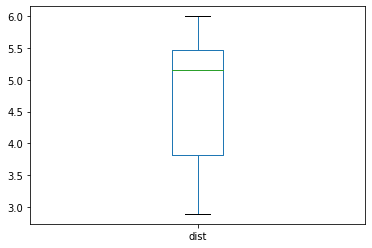

In [14]:
df.dist.plot(kind= 'box')

pasos:  
- medir distancias entre los aa del KD con los del CRE  
- marcar los aa cataliticos

In [25]:
from itertools import product

In [31]:
list(product([1, 2], [3,4]))

[(1, 3), (1, 4), (2, 3), (2, 4)]

In [33]:
from distances import Distances

In [43]:
# for l in dist_cb_6yp3:
#     for elem in l:
#         print(elem)
#     # for chain_a, pos_a, chain_b, pos_b, dist in l:
#     #     print(chain_a, pos_a, chain_b, pos_b, dist)

In [35]:
Distances.is_contact(dist_cb_6yp3)

TypeError: is_contact() missing 4 required positional arguments: 'chain_a', 'pos_a', 'chain_b', and 'pos_b'

In [17]:
distances.save_distances(dist_6yp3, '../datasets/dist_6yp3')